# sparklyr: R interface for Apache Spark
Source: http://spark.rstudio.com/

* Connect to Spark from R. The sparklyr package provides a complete dplyr backend.
* Filter and aggregate Spark datasets then bring them into R for analysis and visualization.
* Use Sparks distributed machine learning library from R.
* Create extensions that call the full Spark API and provide interfaces to Spark packages.


 ![alt text](Desktop/sparklyr-illustration.png)

In [1]:
install.packages("sparklyr")

also installing the dependencies ‘DBI’, ‘config’, ‘rappdirs’, ‘withr’, ‘rstudioapi’, ‘shiny’



In [2]:
library(sparklyr)

In [14]:
spark_install(version = "2.1.0")

In [15]:
sc <- spark_connect(master = "local")

In [28]:
sc

$master
[1] "local[8]"

$method
[1] "shell"

$app_name
[1] "sparklyr"

$config
$config$sparklyr.cores.local
[1] 8

$config$spark.sql.shuffle.partitions.local
[1] 8

$config$spark.env.SPARK_LOCAL_IP.local
[1] "127.0.0.1"

$config$sparklyr.csv.embedded
[1] "^1.*"

$config$`sparklyr.shell.driver-class-path`
[1] ""

attr(,"config")
[1] "default"
attr(,"file")
[1] "/anaconda/lib/R/library/sparklyr/conf/config-template.yml"

$spark_home
[1] "/usr/local/Cellar/apache-spark/2.1.1/libexec"

$backend
        description               class                mode                text 
"->localhost:55631"          "sockconn"                "wb"            "binary" 
             opened            can read           can write 
           "opened"               "yes"               "yes" 

$monitor
       description              class               mode               text 
"->localhost:8880"         "sockconn"               "rb"           "binary" 
            opened           can read          can write

In [16]:
install.packages(c("nycflights13", "Lahman"))

In [17]:
library(dplyr)
iris_tbl <- copy_to(sc, iris)
flights_tbl <- copy_to(sc, nycflights13::flights, "flights")
batting_tbl <- copy_to(sc, Lahman::Batting, "batting")
src_tbls(sc)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



[1] "batting" "flights" "iris"

In [18]:
flights_tbl %>% filter(dep_delay == 2)

Source:   query [6,233 x 19]
Database: spark connection master=local[8] app=sparklyr local=TRUE

    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
1   2013     1     1      517            515         2      830            819
2   2013     1     1      542            540         2      923            850
3   2013     1     1      702            700         2     1058           1014
4   2013     1     1      715            713         2      911            850
5   2013     1     1      752            750         2     1025           1029
6   2013     1     1      917            915         2     1206           1211
7   2013     1     1      932            930         2     1219           1225
8   2013     1     1     1028           1026         2     1350           1339
9   2013     1     1     1042           1040         2     1325           1326
10  2013     1     1     1231     

`geom_smooth()` using method = 'gam'


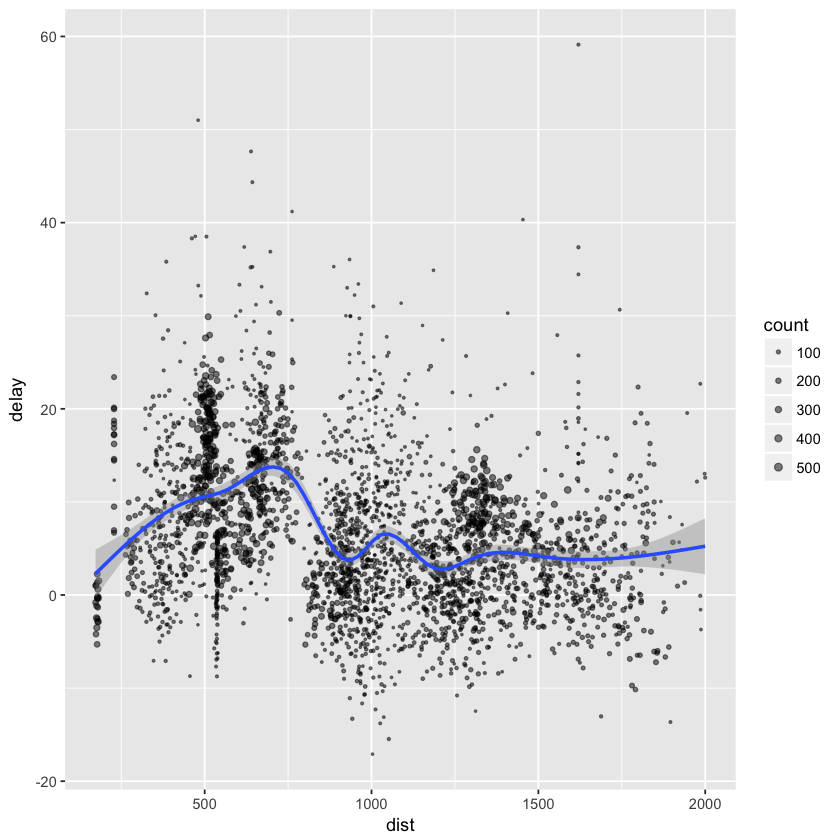

In [19]:
delay <- flights_tbl %>% 
  group_by(tailnum) %>%
  summarise(count = n(), dist = mean(distance), delay = mean(arr_delay)) %>%
  filter(count > 20, dist < 2000, !is.na(delay)) %>%
  collect

# plot delays
library(ggplot2)
ggplot(delay, aes(dist, delay)) +
  geom_point(aes(size = count), alpha = 1/2) +
  geom_smooth() +
  scale_size_area(max_size = 2)

In [20]:
batting_tbl %>%
  select(playerID, yearID, teamID, G, AB:H) %>%
  arrange(playerID, yearID, teamID) %>%
  group_by(playerID) %>%
  filter(min_rank(desc(H)) <= 2 & H > 0)

Source:   query [2.562e+04 x 7]
Database: spark connection master=local[8] app=sparklyr local=TRUE
Groups: playerID

    playerID yearID teamID     G    AB     R     H
       <chr>  <int>  <chr> <int> <int> <int> <int>
1  aaronha01   1959    ML1   154   629   116   223
2  aaronha01   1963    ML1   161   631   121   201
3  abbotji01   1999    MIL    20    21     0     2
4  abnersh01   1992    CHA    97   208    21    58
5  abnersh01   1990    SDN    91   184    17    45
6  acklefr01   1963    CHA     2     5     0     1
7  acklefr01   1964    CHA     3     1     0     1
8  adamecr01   2015    COL    26    53     4    13
9  adamecr01   2014    COL     7    15     1     1
10 adamsac01   1943    NY1    70    32     3     4
# ... with 2.561e+04 more rows

In [27]:
library(DBI)
iris_preview <- dbGetQuery(sc, "SELECT * FROM iris LIMIT 100")
iris_preview

Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


In [22]:
# copy mtcars into spark
mtcars_tbl <- copy_to(sc, mtcars)

# transform our data set, and then partition into 'training', 'test'
partitions <- mtcars_tbl %>%
  filter(hp >= 100) %>%
  mutate(cyl8 = cyl == 8) %>%
  sdf_partition(training = 0.5, test = 0.5, seed = 1099)

# fit a linear model to the training dataset
fit <- partitions$training %>%
  ml_linear_regression(response = "mpg", features = c("wt", "cyl"))

* No rows dropped by 'na.omit' call


In [23]:
fit

Call: ml_linear_regression(., response = "mpg", features = c("wt", "cyl"))

Coefficients:
(Intercept)          wt         cyl 
  33.499452   -2.818463   -0.923187 


In [24]:
summary(fit)

Call: ml_linear_regression(., response = "mpg", features = c("wt", "cyl"))

Deviance Residuals::
   Min     1Q Median     3Q    Max 
-1.752 -1.134 -0.499  1.296  2.282 

Coefficients:
            Estimate Std. Error t value  Pr(>|t|)    
(Intercept) 33.49945    3.62256  9.2475 0.0002485 ***
wt          -2.81846    0.96619 -2.9171 0.0331257 *  
cyl         -0.92319    0.54639 -1.6896 0.1518998    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-Squared: 0.8274
Root Mean Squared Error: 1.422
